In [1]:
%load_ext autoreload
%autoreload 2

from plotutils import make_basic_plot, make_custom_colormap
import xarray as xr
path = 'JUL2020.aijWISO_20th_E2.1.ERA5_ANL.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset> Size: 29MB
Dimensions:                             (lon: 144, lat: 90, shnhgm: 3)
Coordinates:
  * lon                                 (lon) float32 576B -178.8 ... 178.8
  * lat                                 (lat) float32 360B -90.0 -87.0 ... 90.0
Dimensions without coordinates: shnhgm
Data variables: (12/1121)
    axyp                                (lat, lon) float32 52kB ...
    ocnfr                               (lat, lon) float32 52kB ...
    ocnfr_hemis                         (shnhgm) float32 12B ...
    landfr                              (lat, lon) float32 52kB ...
    landfr_hemis                        (shnhgm) float32 12B ...
    oicefr                              (lat, lon) float32 52kB ...
    ...                                  ...
    L-O_TI                              (lat, lon) float32 52kB ...
    L-O_TI_hemis                        (shnhgm) float32 12B ...
    Tatm                                (lat, lon) float32 52kB ...
    Tatm_hemis                          (shnhgm) float32 12B ...
    TMINC                               (lat, lon) float32 52kB ...
    TMINC_hemis                         (shnhgm) float32 12B ...
Attributes:
    xlabel:   WISO_20th_ERA5_ANL (prescribed ocean atmospheric tracer model w...
    fromto:   From:  2020  JUL  1,  Hr  0      To:  2020  AUG  1, Hr  0  Mode...

## Notes
- robinson projection
- discrete colorbars
- other plots https://lilykdonaldson.github.io/NASA-CCRI-Extreme-Precipitation/

# "Default" plot

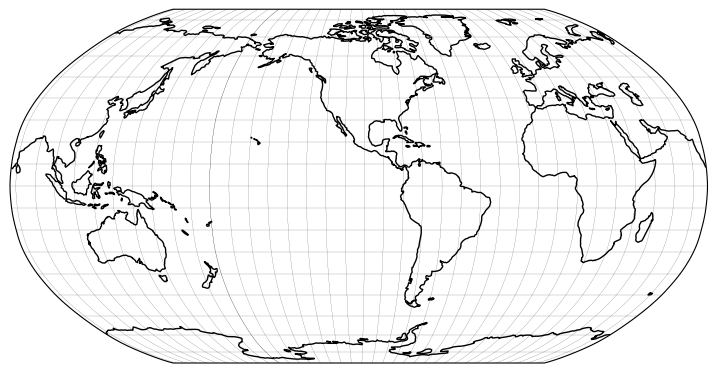

In [2]:
fig, ax = make_basic_plot()
fig

# Temperature plot

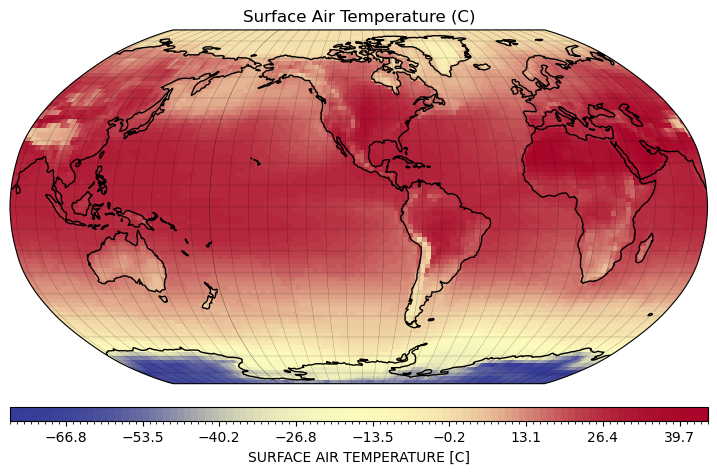

In [36]:
from cartopy import crs as ccrs, feature as cfeature

fig, ax = make_basic_plot()

data = ds['tsurf']
colors, norm = make_custom_colormap(data.min().item(), data.max().item(), 100, 'temperature', 8)

cbar_kwargs = {'orientation':'horizontal', 'pad':0.05, 'aspect':50} # visual options for colorbar
# plotting the data on the graph (ax), with RdYlBu_r color scale and colorbar options
cf = data.plot(ax=ax, 
               cmap=colors, # 'RdYlBu_r', 
               norm = norm,
               cbar_kwargs=cbar_kwargs, 
               transform=ccrs.PlateCarree(central_longitude=0))

ax.set_title('Surface Air Temperature (C)') # title
fig # display figure

# Humidity plot

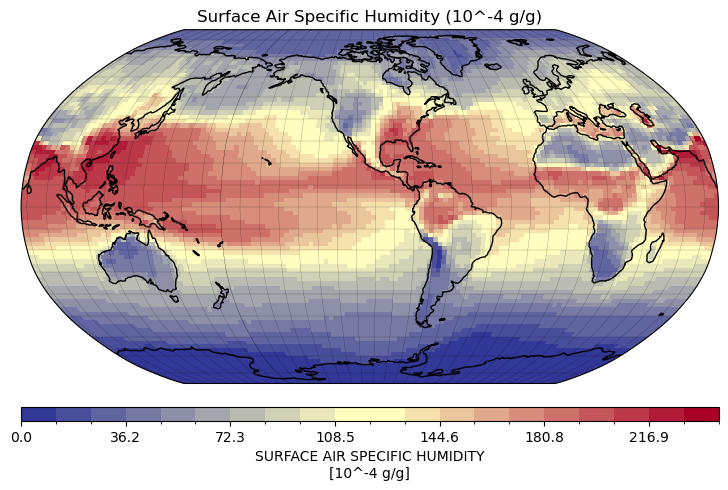

In [37]:
from cartopy import crs as ccrs, feature as cfeature

fig, ax = make_basic_plot()

data = ds['qsurf']
colors, norm = make_custom_colormap(data.min().item(), data.max().item(), 20, 'humidity', 0)

cbar_kwargs = {'orientation':'horizontal', 'pad':0.05, 'aspect':50} # visual options for colorbar
# plotting the data on the graph (ax), with RdYlBu_r color scale and colorbar options
cf = data.plot(ax=ax, 
               cmap=colors, # 'RdYlBu_r', 
               norm = norm,
               cbar_kwargs=cbar_kwargs, 
               transform=ccrs.PlateCarree(central_longitude=0))

ax.set_title('Surface Air Specific Humidity (10^-4 g/g)') # title
fig # display figure

# Precipitation

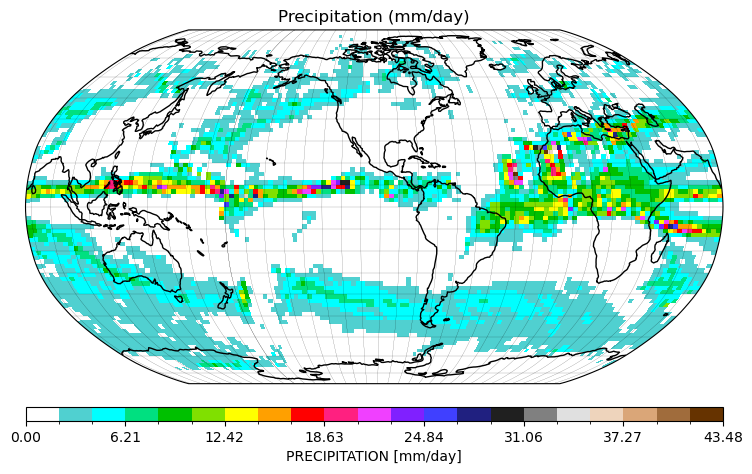

In [14]:
from cartopy import crs as ccrs, feature as cfeature

fig, ax = make_basic_plot()

data = ds['prec']
colors, norm = make_custom_colormap(data.min().item(), data.max().item(), 20, 'precipitation', False)

cbar_kwargs = {'orientation':'horizontal', 'pad':0.05, 'aspect':50} # visual options for colorbar
# plotting the data on the graph (ax), with RdYlBu_r color scale and colorbar options
cf = data.plot(ax=ax, 
               cmap=colors, # 'RdYlBu_r', 
               norm = norm,
               cbar_kwargs=cbar_kwargs, 
               transform=ccrs.PlateCarree(central_longitude=-103))

ax.set_title('Precipitation (mm/day)') # title
fig # display figure

# Global temperature anomaly by month/year